# DATA 612 Final Project
## Matt Briskey

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/MattBriskey/data612_data_mining/main/data_sets/The_Movie_DB_Revenue.csv")
df.head()

,id,budget,original_language,genres,popularity,release_date,runtime,title,revenue
0,1,14000000,en,Comedy,6.575393,2/20/2015,93.0,Hot Tub Time Machine 2,12314651
1,2,40000000,en,Romance,8.248895,8/6/2004,113.0,The Princess Diaries 2: Royal Engagement,95149435
2,3,3300000,en,Drama,64.299990,10/10/2014,105.0,Whiplash,13092000
3,4,1200000,hi,Drama,3.174936,3/9/2012,122.0,Kahaani,16000000
4,5,0,ko,Thriller,1.148070,2/5/2009,118.0,Marine Boy,3923970


In [2]:
df.dtypes #Check the type of the data

id                     int64
budget                 int64
original_language     object
genres                object
popularity           float64
release_date          object
runtime              float64
title                 object
revenue                int64
dtype: object

In [3]:
df.shape #Check the shape of the data

(3000, 9)

In [4]:
df.isna().sum() # Check for missing/null values

id                   0
budget               0
original_language    0
genres               0
popularity           0
release_date         0
runtime              2
title                0
revenue              0
dtype: int64

# Data Exploration

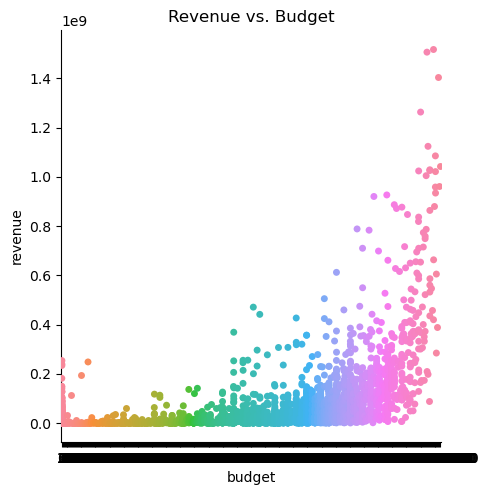

In [5]:
# Catplot comparing revenue and budget
sns.catplot(x='budget', y='revenue', data=df);
plt.title('Revenue vs. Budget');

In [6]:
# Groupby by movie genre
genre = df.groupby("genres")

# Summary statistic of all genres
genre.describe().head()

id                                                           \
           count         mean          std   min     25%     50%      75%   
genres                                                                      
Action      69.0  1554.347826   901.866933  55.0  796.00  1467.0  2508.00   
Adventure   69.0  1472.507246   885.019036   9.0  805.00  1522.0  2292.00   
Animation   12.0  1597.333333  1023.479745  29.0  850.75  1815.0  2384.50   
Comedy     344.0  1478.566860   863.206634   1.0  761.25  1508.5  2264.25   
Crime      151.0  1606.629139   869.076971  14.0  856.00  1654.0  2321.00   

                  budget                ... runtime        revenue  \
              max  count          mean  ...     75%    max   count   
genres                                  ...                          
Action     2826.0   69.0  5.807785e+07  ...   132.0  187.0    69.0   
Adventure  2932.0   69.0  5.208178e+07  ...   121.0  154.0    69.0   
Animation  2922.0   12.0  1.816667e+07  ...    93.0  122.0    12.0   
Comedy     2991.0  344.0  1.628994e+07  ...   106.5  207.0   344.0   
Crime      2985.0  151.0  2.639775e+07  ...   117.0  175.0   151.0   

                                                                         \
                   mean           std      min          25%         50%   
genres                                                                    
Action     2.015594e+08  3.124405e+08   1469.0  14980005.00  85416905.0   
Adventure  2.042627e+08  3.151549e+08      1.0  12000000.00  36754634.0   
Animation  4.695719e+07  9.856387e+07  80768.0   2069953.75   8135829.0   
Comedy     5.465703e+07  1.033630e+08      3.0   3529105.75  19501658.5   
Crime      6.662573e+07  1.013400e+08    204.0   8092936.50  35431113.0   

                                       
                    75%           max  
genres                                 
Action     2.015963e+08  1.506249e+09  
Adventure  2.502885e+08  1.519558e+09  
Animation  4.048943e+07  3.474342e+08  
Comedy     6.565606e+07  1.023784e+09  
Crime      9.410898e+07  8.806746e+08  

[5 rows x 40 columns]

In [7]:
df2 = genre.count().sort_values(by="id",ascending=False).head() # Sort the grouped dataframe in descending order of count of ID
df2

,id,budget,original_language,popularity,release_date,runtime,title,revenue
genres,,,,,,,,
Drama,572,572,572,572,572,571,572,572
Thriller,515,515,515,515,515,515,515,515
Romance,425,425,425,425,425,425,425,425
Comedy,344,344,344,344,344,343,344,344
Science Fiction,169,169,169,169,169,169,169,169


In [8]:
df3=df["genres"].unique() # List the unique genres in the dataset
df3

array(['Comedy', 'Romance', 'Drama', 'Thriller', 'Family', 'Documentary',
       'Adventure', 'Music', 'Crime', 'Mystery', 'Science Fiction',
       'Horror', 'Foreign', 'Animation', 'Western', 'Action', 'Fantasy',
       'History', 'War'], dtype=object)

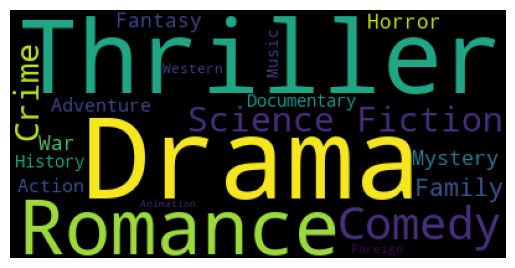

In [9]:
# Create a word cloud to see the most popular genres

text = text = " ".join(cat for cat in df.genres) 

wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [10]:
# Create a dataframe for the top 3 genres by count of movies

top_3_genres = ['Drama', 'Thriller', 'Romance'] 
    
# selecting rows based on condition 
df4 = df[df['genres'].isin(top_3_genres)]
df4

,id,budget,original_language,genres,popularity,release_date,runtime,title,revenue
1,2,40000000,en,Romance,8.248895,8/6/2004,113.0,The Princess Diaries 2: Royal Engagement,95149435
2,3,3300000,en,Drama,64.299990,10/10/2014,105.0,Whiplash,13092000
3,4,1200000,hi,Drama,3.174936,3/9/2012,122.0,Kahaani,16000000
4,5,0,ko,Thriller,1.148070,2/5/2009,118.0,Marine Boy,3923970
6,7,14000000,en,Thriller,7.286477,8/30/2012,92.0,The Possession,85446075
...,...,...,...,...,...,...,...,...,...
2993,2994,60000000,en,Drama,14.092373,6/17/2004,128.0,The Terminal,219417255
2994,2995,0,en,Drama,7.438381,9/18/1992,106.0,School Ties,14715067
2995,2996,0,en,Romance,9.853270,4/22/1994,102.0,Chasers,1596687
2997,2998,65000000,en,Thriller,14.482345,10/11/1996,120.0,The Long Kiss Goodnight,89456761


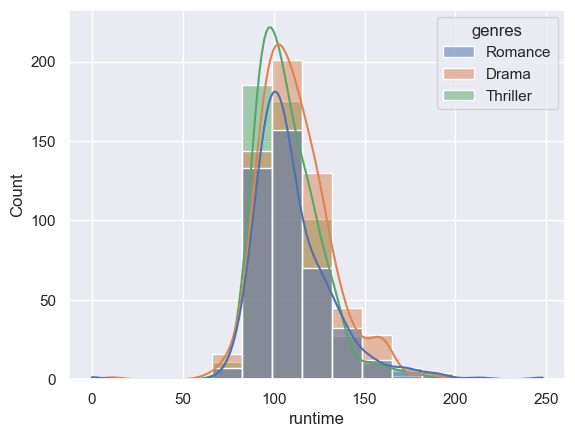

In [11]:
# Histogram showing the runtime by genre for the top 3 genres

sns.set() #Changes the background color to dark and adds grid lines
sns.histplot(data = df4
             , x = 'runtime'
             , kde = True # kde is the kernel density estimate which is the trended line along the histogram
             , bins = 15 # changes the number of bins to 50
             , alpha = 0.5 # sets the transparency of each column.  Acceptable values: 0-1, 0 is more transparent
             , hue = 'genres') # sets each Boro to be a different color
plt.show()

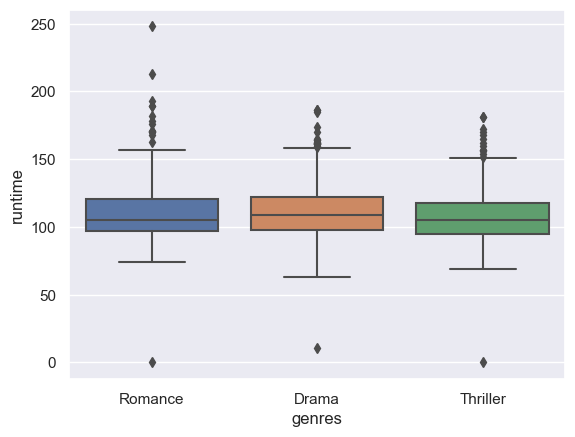

In [12]:
# Box plot for run time by genre for the top 3 genres

sns.boxplot(x="genres" #Determines the x-axis values
            , y="runtime" #Determines the y-axis values
            , data=df4) #Determines what data to use
plt.show()

# Linear Models

#### Model 1

In [13]:
import statsmodels.formula.api as smf

model1 = smf.ols(formula='revenue ~ budget', data=df)
results = model1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     3925.
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        13:22:01   Log-Likelihood:                -59219.
No. Observations:                3000   AIC:                         1.184e+05
Df Residuals:                    2998   BIC:                         1.185e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.709e+06   1.93e+06      1.917      0.0

#### Model 2

In [14]:
model2 = smf.ols(formula='revenue ~ runtime', data=df)
results = model2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     147.2
Date:                Sat, 06 May 2023   Prob (F-statistic):           4.26e-33
Time:                        13:22:01   Log-Likelihood:                -60363.
No. Observations:                2998   AIC:                         1.207e+05
Df Residuals:                    2996   BIC:                         1.207e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.859e+07   1.22e+07     -6.426      0.0

#### Model 3

In [15]:
model3 = smf.ols(formula='revenue ~ popularity', data=df)
results = model3.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     811.1
Date:                Sat, 06 May 2023   Prob (F-statistic):          4.07e-158
Time:                        13:22:01   Log-Likelihood:                -60115.
No. Observations:                3000   AIC:                         1.202e+05
Df Residuals:                    2998   BIC:                         1.202e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.235e+07   2.72e+06      8.221      0.0

Using just budget to predict a film's revenue seems to best better then relying on runtime or popularity as the r-squared for the model using budget is the highest.  The r-squared for each model is listed below: <br> 
<br> 
Model 1 Budget: 0.567 <br> 
model 2 Runtime: 0.047 <br> 
Model 3 Popularity: 0.213

# Multiple Regressions 

Instead of just relying on one variable in the linear regression models above, we can use multiple predictors in the same model using multiple regressions

#### Model 4

In [16]:
model4 = smf.ols(formula='revenue ~ budget + popularity', data=df).fit()

print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     2383.
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        13:22:01   Log-Likelihood:                -59047.
No. Observations:                3000   AIC:                         1.181e+05
Df Residuals:                    2997   BIC:                         1.181e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.187e+07      2e+06     -5.932      0.0

#### Model 5

In [17]:
model5= smf.ols(formula='revenue ~ budget + popularity + runtime', data=df).fit()

print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     1591.
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        13:22:01   Log-Likelihood:                -59006.
No. Observations:                2998   AIC:                         1.180e+05
Df Residuals:                    2994   BIC:                         1.180e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.902e+07   7.84e+06     -3.701      0.0

#### Model 6

In [18]:
model6= smf.ols(formula='revenue ~ budget * popularity', data=df).fit()

print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1611.
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        13:22:01   Log-Likelihood:                -59034.
No. Observations:                3000   AIC:                         1.181e+05
Df Residuals:                    2996   BIC:                         1.181e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -4.164e+06    2.5e+0

# Model Diagnostics

## Residuals

In [19]:
model6= smf.glm(formula='revenue ~ budget * popularity', data=df).fit()

print(model6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                revenue   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2996
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                      7.2461e+15
Method:                          IRLS   Log-Likelihood:                -59034.
Date:                Sat, 06 May 2023   Deviance:                   2.1709e+19
Time:                        13:22:01   Pearson chi2:                 2.17e+19
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8003
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -4.164e+06    2.5e+0

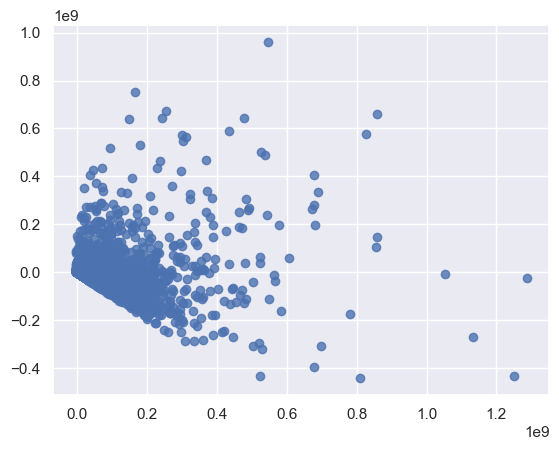

In [20]:
# Plotting the residuals
fig, ax = plt.subplots()

ax = sns.regplot(x=model6.fittedvalues,

            y=model6.resid_deviance, fit_reg=False)

plt.show()

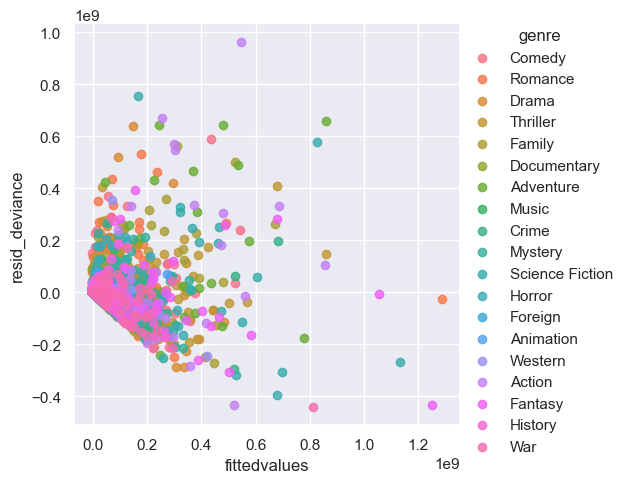

In [21]:
# Using genre as a color for the residuals
res_df = pd.DataFrame({

     'fittedvalues': model6.fittedvalues,

     'resid_deviance': model6.resid_deviance,

     'genre': df['genres']

})


fig = sns.lmplot(x='fittedvalues', y='resid_deviance',

                data=res_df, hue='genre', fit_reg=False)

plt.show()

## Q-Q Plot

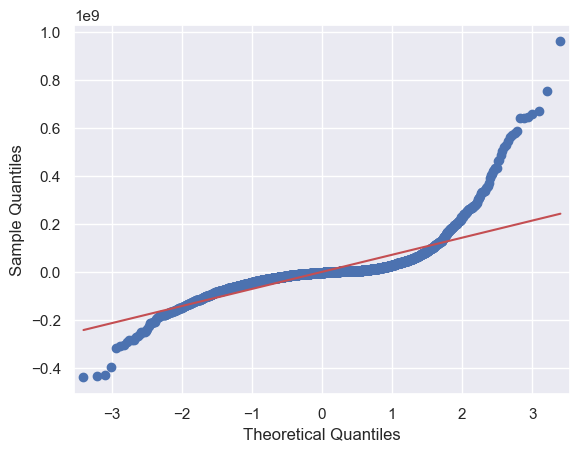

In [22]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

# Checking to see if the data is in fact normal using a Q-Q plot

resid = model6.resid_deviance.copy()

resid_std = stats.zscore(resid)



fig = statsmodels.graphics.gofplots.qqplot(resid, line='r')

plt.show()

C:\Users\16145\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


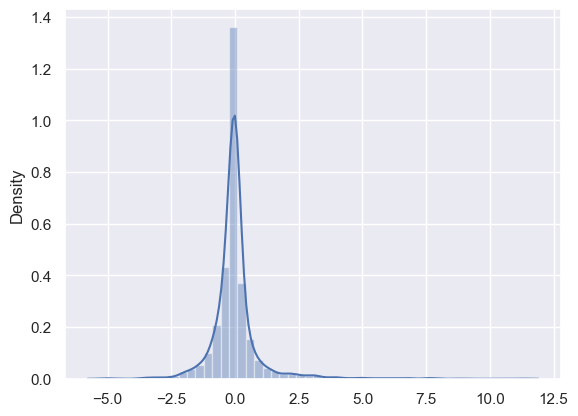

In [23]:
# Plotting the residuals of the Q-Q plot to make sure the data is normally distributed 

fig, ax = plt.subplots()

ax = sns.distplot(resid_std)

plt.show()

## Comparing All the Models

In [24]:
# Collecting all of the models for comparison

f1 = 'revenue ~ budget'

f2 = 'revenue ~ runtime'

f3 = 'revenue ~ popularity'

f4 = 'revenue ~ budget + popularity'

f5 = 'revenue ~ budget + popularity + runtime'

f6 = 'revenue ~ budget * popularity'

model_1 = smf.ols(f1, data=df).fit()

model_2 = smf.ols(f2, data=df).fit()

model_3 = smf.ols(f3, data=df).fit()

model_4 = smf.ols(f4, data=df).fit()

model_5 = smf.ols(f5, data=df).fit()

model_6 = smf.ols(f6, data=df).fit()

In [25]:
# Collecting all of the models for comparison

mod_results = pd.concat([model_1.params, model_2.params, model_3.params,

          model_4.params, model_5.params, model_6.params], axis=1).rename(columns=lambda x: 'model' + str(x + 1)).reset_index().rename(columns={'index': 'param'}).melt(id_vars='param', var_name='model', value_name='estimate')



print(mod_results.head())

               param   model      estimate
0          Intercept  model1  3.708755e+06
1             budget  model1  2.796865e+00
2            runtime  model1           NaN
3         popularity  model1           NaN
4  budget:popularity  model1           NaN


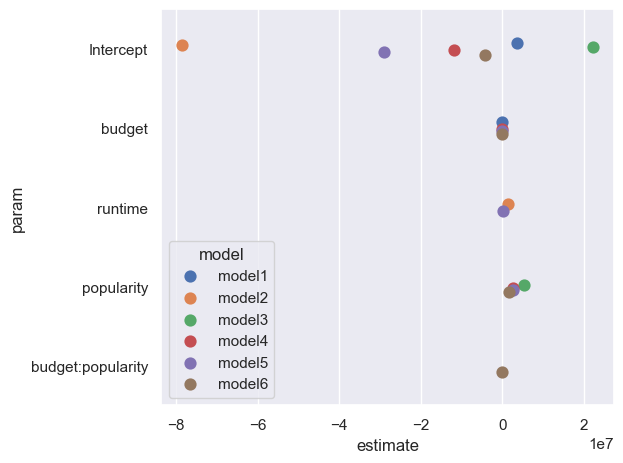

In [26]:
# Plot the model's coefficients to quickly see how the models are estimating parameters in relation to each other

fig, ax = plt.subplots()

ax = sns.pointplot(x="estimate", y="param", hue="model",

                   data=mod_results,

                   dodge=True, # jitter the points

                   join=False) # don't connect the points

plt.tight_layout()

plt.show()

## ANOVA

In [27]:
# Run the analysis of vairance (ANOVA) to find the Residual Sum of Squares (RSS)

model_names = ['model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6']

model_anova = statsmodels.stats.anova.anova_lm(

    model_1, model_2, model_3, model_4, model_5, model_6)

model_anova.index = model_names

print(model_anova)

         df_resid           ssr  df_diff       ss_diff            F    Pr(>F)
model_1    2998.0  2.456510e+19      0.0           NaN          NaN       NaN
model_2    2996.0  5.406207e+19      2.0 -2.949697e+19 -2035.360055  1.000000
model_3    2998.0  4.464685e+19     -2.0  9.415223e+18  -649.672440       NaN
model_4    2997.0  2.189935e+19      1.0  2.274749e+19  3139.260377  0.000000
model_5    2994.0  2.186186e+19      3.0  3.749935e+16     1.725028  0.159663
model_6    2996.0  2.170941e+19     -2.0  1.524467e+17   -10.519182       NaN


Model 6 has the lowest RSS as seen above so that is the best model out of the 6

## k-Fold Cross-Validation

One of the main benefits of cross validation is that it can account for how well your model performs on new data. It does this by partitioning your data into k parts. It holds one of the parts aside as the “test” set and then fits the model on the remaining k – 1 parts, the “training” set. The fitted model is then used on the “test” and an error rate is calculated. This process is repeated until all k parts have been used as a “test” set. The final error of the model is some average across all the models.

In [28]:
# split the data into k – 1 testing and training data sets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


print(df.columns)

Index(['id', 'budget', 'original_language', 'genres', 'popularity',
       'release_date', 'runtime', 'title', 'revenue'],
      dtype='object')


In [29]:
# get training and test data

X_train, X_test, y_train, y_test = train_test_split(

    pd.get_dummies(df[['budget', 'popularity']],

                       drop_first=True),

    df['revenue'],

    test_size=0.20,

    random_state=42

)

In [30]:
# get a score that indicates how well our model is performing using our test data
lr = LinearRegression().fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.6062325247572948


In [31]:
from sklearn.model_selection import KFold, cross_val_score
from patsy import dmatrices

kf = KFold(n_splits=5)  # Use k=5 folds

# train and test our model on each fold

y, X = dmatrices('revenue ~ budget + popularity', df)

coefs = []

scores = []

for train, test in kf.split(X):

    X_train, X_test = X[train], X[test]
         
    y_train, y_test = y[train], y[test]

    lr = LinearRegression().fit(X_train, y_train)

    coefs.append(pd.DataFrame(lr.coef_))

    scores.append(lr.score(X_test, y_test))

# View the results    

coefs_df = pd.concat(coefs)

coefs_df.columns = X.design_info.column_names

coefs_df

,Intercept,budget,popularity
0,0.0,2.565237,2.680859e+06
0,0.0,2.420986,2.294620e+06
0,0.0,2.540012,3.013934e+06
0,0.0,2.489784,2.650795e+06
0,0.0,2.488034,2.521236e+06


In [32]:
# look at the average coefficient across all folds using apply and the np.mean function
import numpy as np

print(coefs_df.apply(np.mean))

Intercept     0.000000e+00
budget        2.500810e+00
popularity    2.632289e+06
dtype: float64


In [33]:
# Look at the scores.  Since these are linear regressions, the below is the R-squared value for each fold specified above
print(scores)

[0.45891314022867125, 0.6721924668602467, 0.5112624138923114, 0.7117219830657863, 0.6003500142119347]


In [34]:
# use cross_val_scores to calculate CV scores

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=5)

print(scores)

[0.45891314 0.67219247 0.51126241 0.71172198 0.60035001]


In [35]:
# Calculate the average score across the 5 folds 
print(scores.mean())

0.5908880036517902


In [36]:
# refit all our models using k-fold cross-validation

# create the predictor and response matrices

y1, X1 = dmatrices('revenue ~ budget', df)

y2, X2 = dmatrices('revenue ~ runtime', df)

y3, X3 = dmatrices('revenue ~ popularity', df)

y4, X4 = dmatrices('revenue ~ budget + popularity', df)

y5, X5 = dmatrices('revenue ~ budget + popularity + runtime', df)

y6, X6 = dmatrices('revenue ~ budget * popularity', df)

# fit our models

model = LinearRegression()



scores1 = cross_val_score(model, X1, y1, cv=5)

scores2 = cross_val_score(model, X2, y2, cv=5)

scores3 = cross_val_score(model, X3, y3, cv=5)

scores4 = cross_val_score(model, X4, y4, cv=5)

scores5 = cross_val_score(model, X5, y5, cv=5)

scores6 = cross_val_score(model, X6, y6, cv=5)

In [37]:
# Look at the cross validation scores 
scores_df = pd.DataFrame([scores1, scores2, scores3,

                          scores4, scores5, scores6])

In [38]:
print(scores_df.apply(np.mean, axis=1))

0    0.549299
1    0.042896
2    0.189333
3    0.590888
4    0.591299
5    0.590967
dtype: float64


As seen above, models 4, 5, and 6 all have very similar cross validation scores 